# Ultralytics YOLO V3 Inference

In [1]:
import warnings
warnings.filterwarnings('ignore')

# GPU 정보 확인

In [2]:
!nvidia-smi

Mon Apr 17 04:15:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# I. Ultralytics YOLO v3 설치

* https://github.com/ultralytics/yolov3

>## 1) YOLO v3 Git Clone

* 현재 작업 디렉토리 확인

In [3]:
!pwd

/content


* Git Clone

In [4]:
!git clone https://github.com/ultralytics/yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 10485, done.
remote: Counting objects: 100% (407/407), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 10485 (delta 237), reused 364 (delta 231), pack-reused 10078
Receiving objects: 100% (10485/10485), 9.73 MiB | 20.29 MiB/s, done.
Resolving deltas: 100% (7035/7035), done.


* 결과 확인

In [5]:
!ls -l

total 8
drwxr-xr-x 1 root root 4096 Apr 13 13:30 sample_data
drwxr-xr-x 9 root root 4096 Apr 17 04:15 yolov3


>## 2)작업 디렉토리 변경

* /content/yolov3

In [6]:
%cd yolov3

/content/yolov3


* 결과 확인

In [7]:
!pwd

/content/yolov3


>## 3) Install Dependencies

* requirements.txt 확인

In [8]:
!cat requirements.txt

# YOLOv3 requirements
# Usage: pip install -r requirements.txt

# Base ------------------------------------------------------------------------
gitpython
ipython  # interactive notebook
matplotlib>=3.2.2
numpy>=1.18.5
opencv-python>=4.1.1
Pillow>=7.1.2
psutil  # system resources
PyYAML>=5.3.1
requests>=2.23.0
scipy>=1.4.1
thop>=0.1.1  # FLOPs computation
torch>=1.7.0  # see https://pytorch.org/get-started/locally (recommended)
torchvision>=0.8.1
tqdm>=4.64.0
# protobuf<=3.20.1  # https://github.com/ultralytics/yolov5/issues/8012

# Logging ---------------------------------------------------------------------
tensorboard>=2.4.1
# clearml>=1.2.0
# comet

# Plotting --------------------------------------------------------------------
pandas>=1.1.4
seaborn>=0.11.0

# Export ----------------------------------------------------------------------
# coremltools>=6.0  # CoreML export
# onnx>=1.12.0  # ONNX export
# onnx-simplifier>=0.4.1  # ONNX simplifier
# nvidia-pyindex  # TensorRT export
# 

* requirements.txt 설치

In [9]:
!pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00


>## 4) torch 및 GPU 설정 확인

In [10]:
import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.0+cu118 (Tesla T4)


# II. Image Detection

* https://github.com/ultralytics/yolov3/blob/master/tutorial.ipynb


>## 1) Test Images

* Image 확인

In [11]:
!ls -l data/images

total 648
-rw-r--r-- 1 root root 487438 Apr 17 04:15 bus.jpg
-rw-r--r-- 1 root root 168949 Apr 17 04:15 zidane.jpg


>## 2) Inference 수행

* COCO Pretrained yolov3.pt Weight Download
* --project: runs/detect/exp 디렉토리에 Detection 결과 저장
 - --exist-ok: 결과 디렉토리 재성성하지 않음

In [12]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images --exist-ok --line-thickness 2

detect: weights=['yolov3.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv3 🚀 v9.6.0-57-g843d31a Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

100% 119M/119M [00:02<00:00, 56.6MB/s]

Fusing layers... 
yolov3 summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bicycle, 1 bus, 51.0ms
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 49.2ms
Speed: 0.5ms pre-process, 50.1ms inference, 136.5ms NMS per image at shape (1, 3, 640, 640)
Results saved t

>## 3) Inference 결과

* runs/detect/exp

In [13]:
!ls -l runs/detect/exp

total 728
-rw-r--r-- 1 root root 494073 Apr 17 04:16 bus.jpg
-rw-r--r-- 1 root root 249539 Apr 17 04:16 zidane.jpg


* 결과 시각화

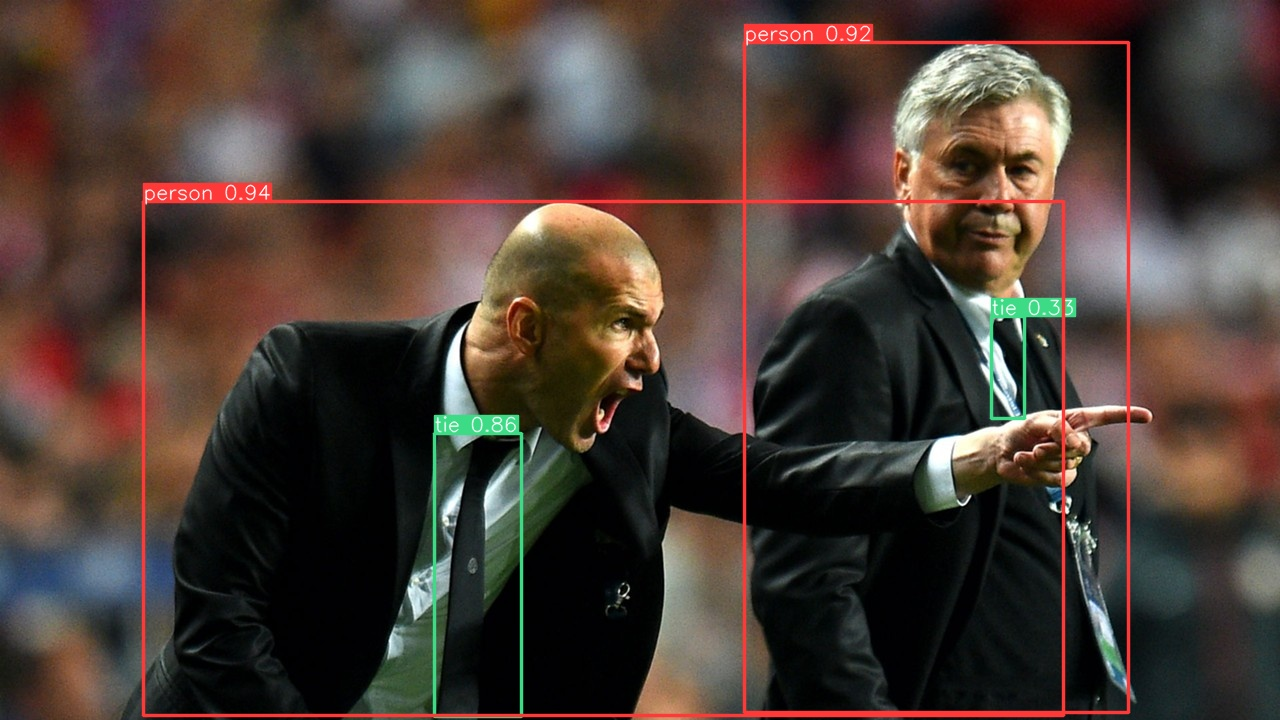

In [14]:
from IPython.display import Image, clear_output 

Image(filename = 'runs/detect/exp/zidane.jpg')

># III. 추가 Image Detection

* 현재 작업 디렉토리

In [15]:
!pwd

/content/yolov3


>## 1) Image Download

In [16]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/image/KIA.jpg

--2023-04-17 04:16:07--  https://raw.githubusercontent.com/rusita-ai/pyData/master/image/KIA.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65805 (64K) [image/jpeg]
Saving to: ‘KIA.jpg’

KIA.jpg             100%[===================>]  64.26K  --.-KB/s    in 0.003s  

2023-04-17 04:16:08 (18.5 MB/s) - ‘KIA.jpg’ saved [65805/65805]



* 결과 확인

In [17]:
!ls -l KIA.jpg

-rw-r--r-- 1 root root 65805 Apr 17 04:16 KIA.jpg


>## 2) Inference 수행

* --project /content/data: 
* --name=run_image

In [18]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/yolov3/KIA.jpg --project /content/data  --name=run_image --exist-ok --line-thickness 1

detect: weights=['yolov3.pt'], source=/content/yolov3/KIA.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_image, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv3 🚀 v9.6.0-57-g843d31a Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov3 summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/yolov3/KIA.jpg: 480x640 4 persons, 1 car, 56.6ms
Speed: 0.5ms pre-process, 56.6ms inference, 113.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/run_image


>## 3) Inference 결과

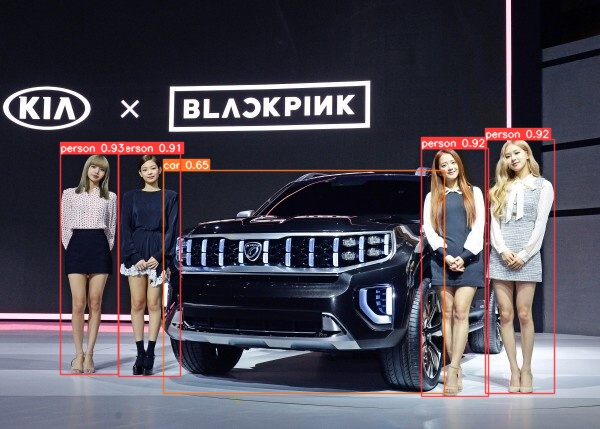

In [19]:
Image(filename = '/content/data/run_image/KIA.jpg')

# IV. Video Detection

>## 1) Video File Download

* matrix.mp4 다운로드

In [24]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/image/Matrix2.mp4

--2023-04-17 04:18:00--  https://raw.githubusercontent.com/rusita-ai/pyData/master/image/Matrix2.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17873420 (17M) [application/octet-stream]
Saving to: ‘Matrix2.mp4’

Matrix2.mp4         100%[===================>]  17.04M  --.-KB/s    in 0.06s   

2023-04-17 04:18:01 (297 MB/s) - ‘Matrix2.mp4’ saved [17873420/17873420]



* matrix.mp4 확인

In [25]:
import io
import base64
from IPython.display import HTML

video = io.open('/content/yolov3/Matrix2.mp4', 'r+b').read()

encoded = base64.b64encode(video)

HTML(data='''<video width = "70%" controls>
                <source src = "data:video/mp4;base64,{0}" type = "video/mp4"/>
             </video>'''.format(encoded.decode('ascii')))

Output hidden; open in https://colab.research.google.com to view.

>## 2) Video Inference 수행

* --project=/content/data/run_video
 - 약 5분

In [26]:
%%time

!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/yolov3/Matrix2.mp4 --project=/content/data/run_video --exist-ok --line-thickness 2

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
video 1/1 (3265/8260) /content/yolov3/Matrix2.mp4: 384x640 1 person, 27.2ms
video 1/1 (3266/8260) /content/yolov3/Matrix2.mp4: 384x640 1 person, 26.8ms
video 1/1 (3267/8260) /content/yolov3/Matrix2.mp4: 384x640 1 person, 25.6ms
video 1/1 (3268/8260) /content/yolov3/Matrix2.mp4: 384x640 1 person, 25.3ms
video 1/1 (3269/8260) /content/yolov3/Matrix2.mp4: 384x640 1 person, 26.6ms
video 1/1 (3270/8260) /content/yolov3/Matrix2.mp4: 384x640 1 person, 27.3ms
video 1/1 (3271/8260) /content/yolov3/Matrix2.mp4: 384x640 1 person, 28.0ms
video 1/1 (3272/8260) /content/yolov3/Matrix2.mp4: 384x640 1 person, 27.1ms
video 1/1 (3273/8260) /content/yolov3/Matrix2.mp4: 384x640 1 person, 25.9ms
video 1/1 (3274/8260) /content/yolov3/Matrix2.mp4: 384x640 1 person, 25.2ms
video 1/1 (3275/8260) /content/yolov3/Matrix2.mp4: 384x640 1 person, 24.4ms
video 1/1 (3276/8260) /content/yolov3/Matrix2.mp4: 384x640 1 person, 25.5ms
video 1/1 (3277/8260) /content/yolov3/Matrix2.mp4: 3

# 
# 
# 
# The End
# 
# 
# 